25786
(1000, 1000)


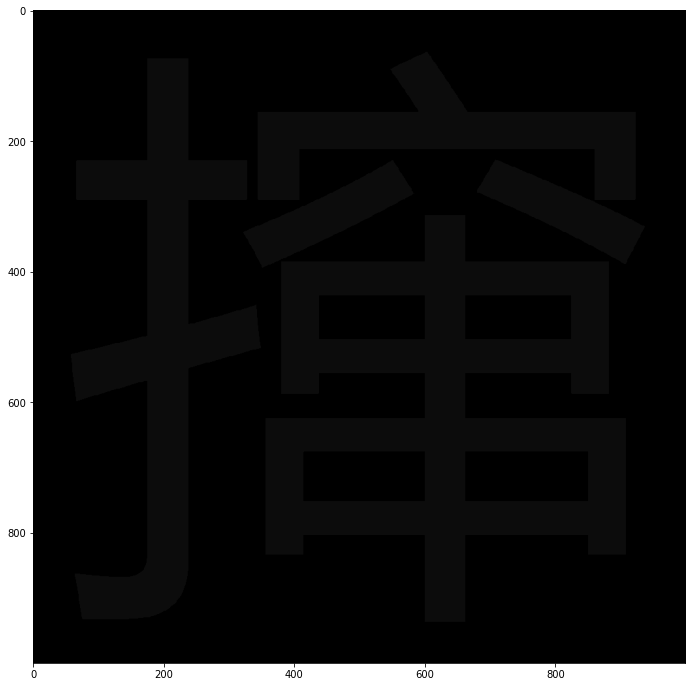

In [35]:
import matplotlib.pyplot as plt
import numpy as np

import FormalImage as fi
#东湭
character = chr(ord('\u4E00') +  np.random.randint(10000)) # 瓿 "\u68D1" # '湭'
print(ord(character))

charImg = fi.renderChar(character, show=True, fontsize=1000)
print(np.shape(charImg))

## Part one:  Determine each pixel's distance from the border

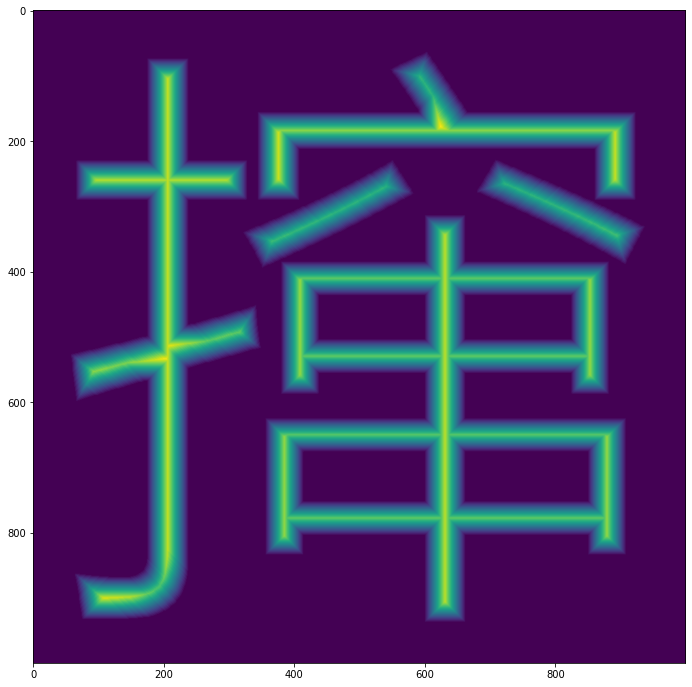

In [36]:
distImg = charImg.copy()
distImg[distImg >= 1] = -1

currBorderDist = 0
while(np.min(distImg) == -1):
    #if pixel borders (diagonal counts too), note these next lines could cause border effects if a "road" is touching the border
    tempImg = distImg.copy()
    borderMask  = tempImg[1:-1, 1:-1] == currBorderDist
    #neighbor is on border and is not already set
    tempImg[0:-2,0:-2][borderMask & (tempImg[0:-2,0:-2] == -1)] = currBorderDist + 1 #top left
    tempImg[0:-2,1:-1][borderMask & (tempImg[0:-2,1:-1] == -1)] = currBorderDist + 1 #top
    tempImg[1:-1,0:-2][borderMask & (tempImg[1:-1,0:-2] == -1)] = currBorderDist + 1 #left
    tempImg[1:-1,2:][  borderMask & (tempImg[1:-1,2:] == -1)]   = currBorderDist + 1 #top
    tempImg[2:,1:-1][  borderMask & (tempImg[2:,1:-1] == -1)]   = currBorderDist + 1 #bottom
    tempImg[0:-2,0:-2][borderMask & (tempImg[0:-2,0:-2] == -1)] = currBorderDist + 1 #top left
    tempImg[0:-2,2:][  borderMask & (tempImg[0:-2,2:] == -1)]   = currBorderDist + 1 #top right
    tempImg[2:,0:-2][  borderMask & (tempImg[2:,0:-2] == -1)]   = currBorderDist + 1 #bottom left
    tempImg[2:,2:][    borderMask & (tempImg[2:,2:] == -1)]     = currBorderDist + 1 #bottom right
    currBorderDist += 1
    
    distImg = tempImg.copy()
    
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(distImg)

35.0 -1000.0
1000.0 1.0
8.0 -1.0


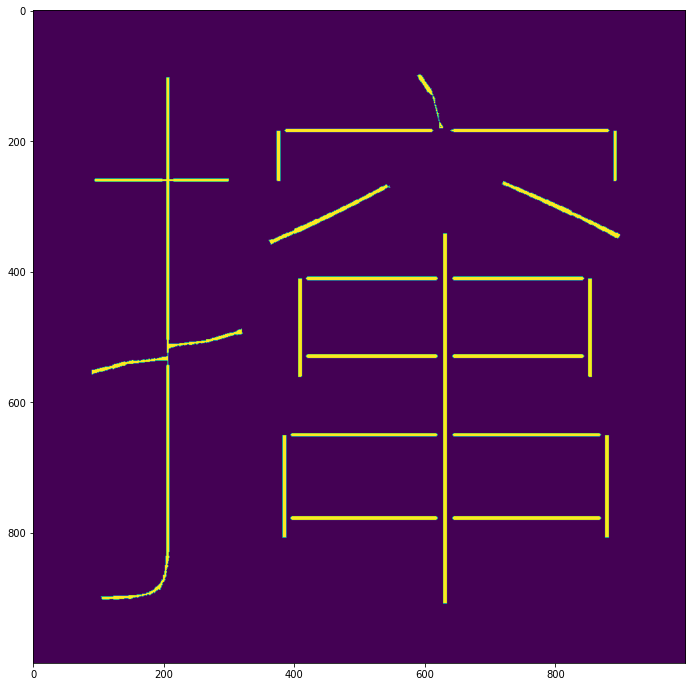

In [37]:
#somewhat complicated use of masks to achieve fast calculation of the distImg
minImg = np.ones(np.shape(distImg))*1000
maxImg = np.ones(np.shape(distImg))*1000*-1

borderDiff = 8
totalPad = borderDiff+1
for xDiff in range(-borderDiff,1+borderDiff):
    for yDiff in range(-borderDiff,1+borderDiff):
        if(xDiff == 0 and yDiff == 0): #we don't count the center
            continue
        nonZeroMask = (distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff] > 0)
        minMask = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff] < minImg[totalPad:-totalPad, totalPad:-totalPad]
        maxMask  = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff] > maxImg[totalPad:-totalPad, totalPad:-totalPad]
        
        minImg[totalPad:-totalPad, totalPad:-totalPad][nonZeroMask & minMask] = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff][nonZeroMask & minMask]
        maxImg[totalPad:-totalPad, totalPad:-totalPad][nonZeroMask & maxMask] = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff][nonZeroMask & maxMask]

diffImg = maxImg - distImg
diffImg[distImg == 0] = 0

tempImg = np.zeros(np.shape(diffImg))
tempImg[(diffImg >= 0) & (diffImg <= 2)] = 1
tempImg[distImg == 0] = 0

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(tempImg)
print(np.max(maxImg), np.min(maxImg))
print(np.max(minImg), np.min(minImg))
print(np.max(diffImg), np.min(diffImg))
plt.imsave("testImageDiff.png", tempImg, cmap="gray")

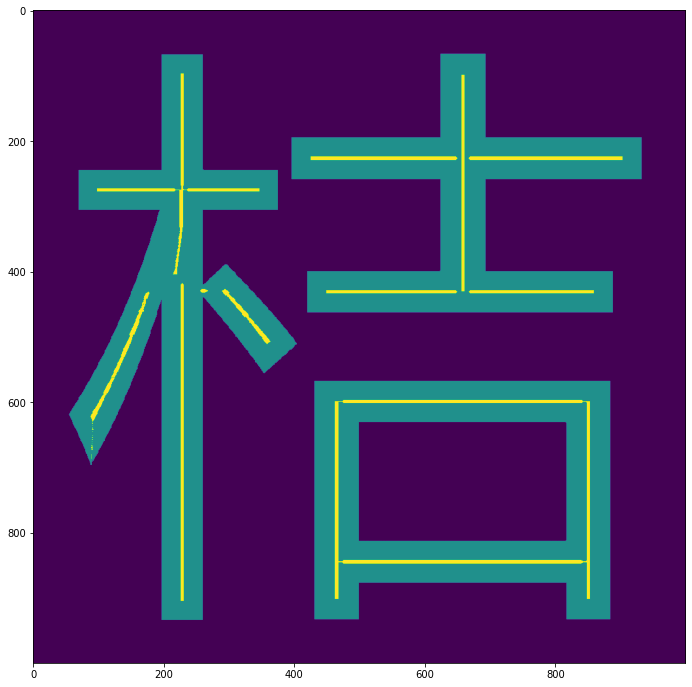

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(charImg + tempImg)

撺


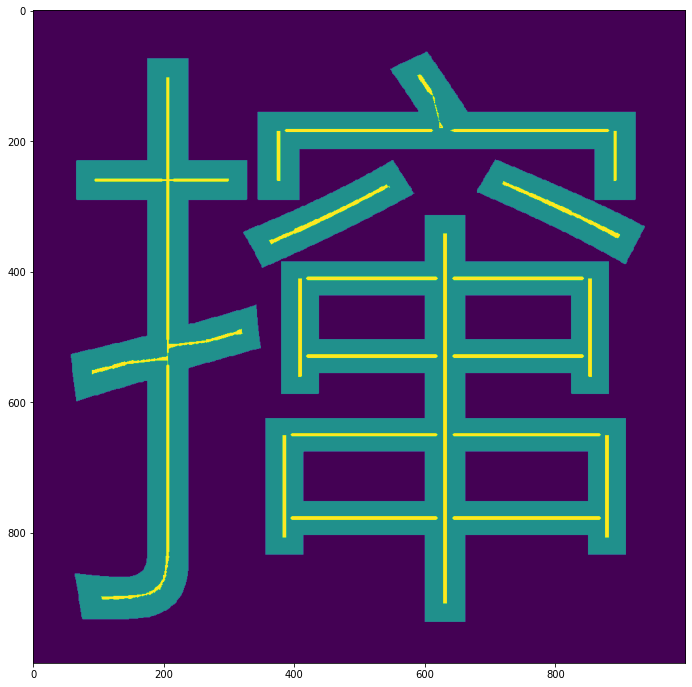

In [38]:
#we may have small artifacts, remove if height is too shallow
tempImg[distImg < np.max(distImg)*.333] = 0

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(charImg + tempImg)
print(character)

In [152]:
coords = np.array(np.where(tempImg == 1)).transpose()
print(coords)

[[100 238]
 [101 234]
 [101 235]
 ...
 [910 384]
 [910 385]
 [910 386]]


In [174]:
x = np.linspace(230,245,10).astype(int)
y = np.linspace(100,105,10).astype(int)
print(x,y)
print( distImg[(y,x)] )
print( 3 np.pi )

[230 231 233 235 236 238 240 241 243 245] [100 100 101 101 102 102 103 103 104 105]
[20. 20. 21. 22. 23. 23. 22. 21. 20. 19.]
3.141592653589793


In [494]:
def getSideDiff(img, coord, radius, angle, samples=10):
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle + np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle + np.pi/2)),10).astype(int)
    leftSum = np.sum(img[(ySamples,xSamples)])
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle - np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle - np.pi/2)),10).astype(int)
    rightSum = np.sum(img[(ySamples,xSamples)])
    return ((leftSum) - (rightSum))/samples #e.g. if result is positive we increase angle

def getTotalElevation(img, coord, radius, angle, samples=10):
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle + np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle + np.pi/2)),10).astype(int)
    leftSum = np.sum(img[(ySamples,xSamples)])
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle - np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle - np.pi/2)),10).astype(int)
    rightSum = np.sum(img[(ySamples,xSamples)])
    return (leftSum + rightSum)/samples #e.g. if result is positive we increase angle

def runRobot(img, coord, radius, angle, samples=10, delta=1, epsilon=1):
    print(coord, radius, angle)
    coords = [coord.copy()]
    angles = [angle]
    if(epsilon*radius < 1):
        epsilon = 1.2/radius #adjust to make it large enough
    delta = epsilon*1/np.pi
    while(img[coord[0], coord[1]] > 5 and len(angles) < 10000):
        sideDiff = getSideDiff(img, coord, radius, angle)
        if(abs(sideDiff) > 2):
            angle += sideDiff*delta
        if(sideDiff*delta > np.pi):
            print("bruh?")
            break #angle change too large, 60 degree change
        coord[0] += epsilon*radius*np.sin(angle)
        coord[1] += epsilon*radius*np.cos(angle)
        angles.append(angle)
        coords.append(coord.copy())
    return coords, angles

[740 908] 29.0 1.6492929292929295
[740 908] 29.0 4.790885582882723


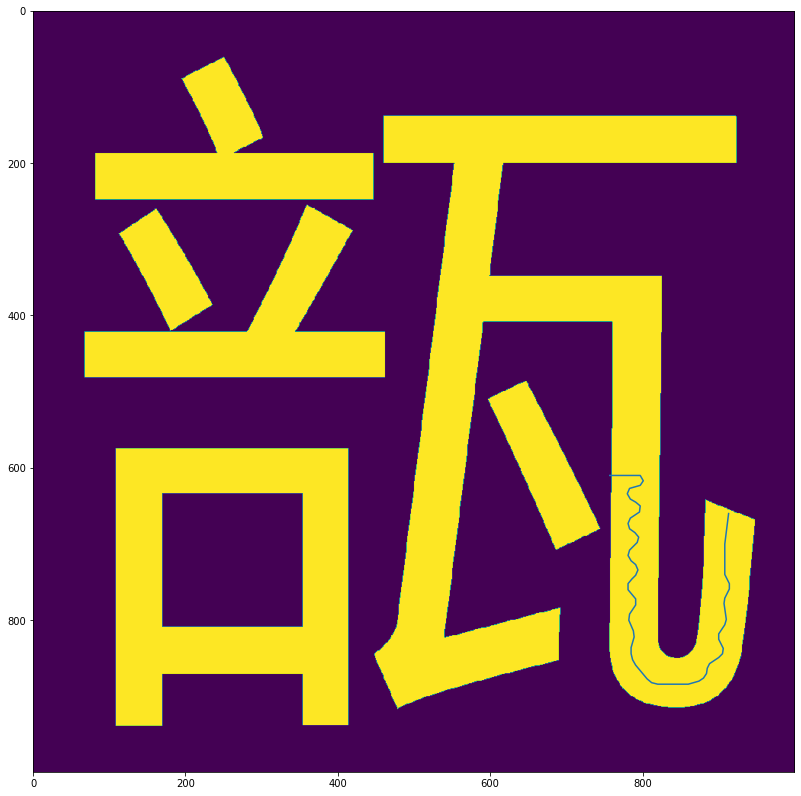

In [493]:
#start with the first possible coord we can use
coords = np.array(np.where(tempImg == 1)).transpose()
coord = coords[18075] #[y,x]

radiusLarge = distImg[coord[0], coord[1]]
radius = radiusLarge #half the size of the large radius

angles = np.linspace(0,3.14, 100)
results = abs(np.array([getTotalElevation(distImg, coord, radiusLarge, a) for a in angles]))
angle = angles[np.argmin(results)]

delta = .2
epsilon = .25
coords, angles = runRobot(distImg, coord.copy(), radius, angle, delta=delta, epsilon=epsilon)

angles.reverse()
coords.reverse()
coord = coords[-1].copy()
angle = angles[-1]+np.pi #go the other direction

coords2, angles2 = runRobot(distImg, coord.copy(), radius, angle, delta=delta, epsilon=epsilon)

coords = coords + coords2
angles = angles + angles2

coords = np.array(coords)
coords2 = np.array(coords2)
angles = np.array(angles)

fig, ax = plt.subplots(figsize=(14,14))
ax.set_xlim([0,1000-1])
ax.set_ylim([0,1000-1])
ax.plot(coords[:,1], coords[:,0])
ax.invert_yaxis()
ax.imshow(charImg)
#print(coords)

In [448]:
print(coords3)
print(coords2)
print(coords3+coords2)
coords3 = coords3+coords2
print(coords3)

[array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64)]
[array([659, 908], dtype=int64)]
[array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([659, 908], dtype=int64)]
[array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), arra

In [ ]:
#road path, 5 for main road, 1 for nearby dirt path, forbidden to go anywhere else.
#rules: we start with a frontier of just the root node
#when we add its 4 neighbors to the frontier
#for each neighbor if it's been explored, we replace if the route is cheaper, otherwise we destroy the current route and the branch
#because the route is more expensive
#also don't explore a neighbor if the route difference is trivial (e.g. moving right and then immedietly left)
#explored is a dictionary of coords with the key being the list of the route.


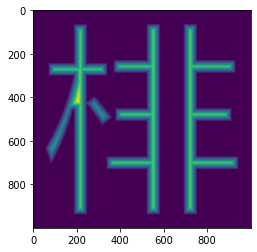

In [88]:
plt.imshow(distImg)

In [82]:
print(np.sum(diffImg >= 4))

232716


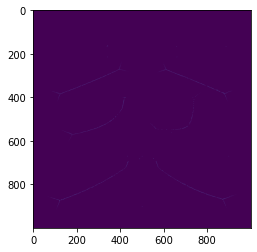

In [118]:
#now determine the psuedo global maximum (all neighbors, including diagonals), are equal or less than

tempImg = distImg.copy()
neighborImg = tempImg[1:-1, 1:-1]
#neighbor is a greater value
tempImg[0:-2,0:-2][neighborImg > tempImg[0:-2,0:-2]] = 0 #top left
tempImg[0:-2,1:-1][neighborImg > tempImg[0:-2,1:-1]] = 0 #top
tempImg[1:-1,0:-2][neighborImg > tempImg[1:-1,0:-2]] = 0 #left
tempImg[1:-1,2:][  neighborImg > tempImg[1:-1,2:]]   = 0 #top
tempImg[2:,1:-1][  neighborImg > tempImg[2:,1:-1]]   = 0 #bottom
tempImg[0:-2,0:-2][neighborImg > tempImg[0:-2,0:-2]] = 0 #top left
tempImg[0:-2,2:][  neighborImg > tempImg[0:-2,2:]]   = 0 #top right
tempImg[2:,0:-2][  neighborImg > tempImg[2:,0:-2]]   = 0 #bottom left
tempImg[2:,2:][    neighborImg > tempImg[2:,2:]]     = 0 #bottom right
distImg = tempImg.copy()

plt.imshow(distImg)

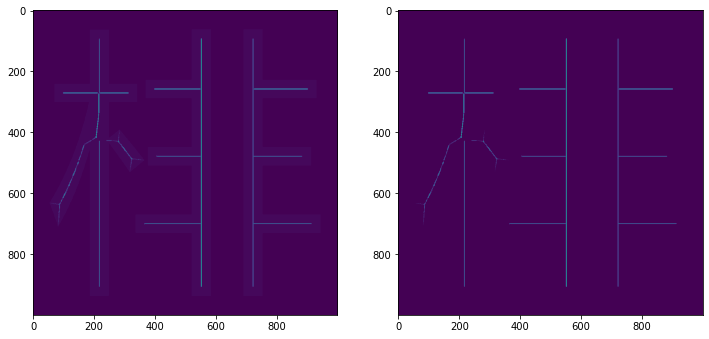

In [20]:
distList = []
countList = []
for num in range(1, int(np.max(distImg)+1)):
    distList.append(num)
    countList.append(np.sum(distImg == num))

lowestAccepted = distList[countList.index(max(countList))] * 0
#distList.reverse()
#countList.reverse()
#
#print(countList)
#
#pivot = 0 #inclusive
#usedPixels = countList[pivot]
#neededPercent = .9 #we need to use 95
#totalCount = np.sum(distImg > 0) #nonzero pixel count
#while(usedPixels <= totalCount*neededPercent):
#    pivot += 1
#    usedPixels += countList[pivot]
#    
#print(pivot)
tempImg = np.zeros(np.shape(distImg))
#tempImg[distImg >= distList[pivot]] = distImg[distImg >= distList[pivot]]
tempImg[distImg >= lowestAccepted] = distImg[distImg >= lowestAccepted]

fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(charImg + tempImg)
ax[1].imshow(tempImg)
plt.imsave("testImage.png", distImg)
plt.imsave("testImage2.png", tempImg)

[20, 33, 24, 28, 32, 21, 28, 28, 30, 26, 28, 28, 25, 26, 29, 20, 21, 34, 26, 106, 21, 27, 152, 313, 233, 223, 187, 1014, 1060, 1581, 584, 1093, 6, 5, 7, 1] 7120


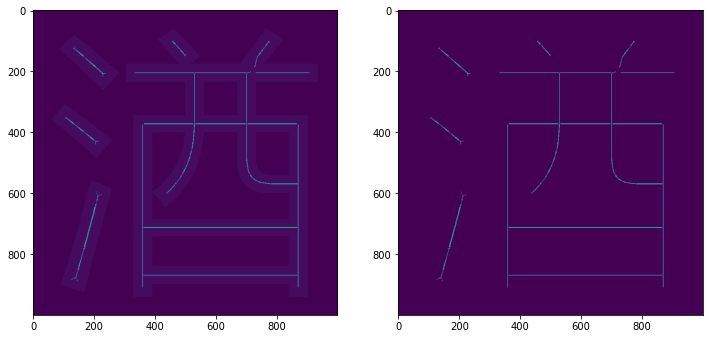

In [10]:
totalCount = np.sum(distImg > 0)

distList = []
countList = []

for num in range(1, int(np.max(distImg)+1)):
    distList.append(num)
    countList.append(np.sum(distImg == num))
    
print(countList, totalCount)

usedPixels = 0
neededPercent = .90 #we need to use 95
tempImg = np.zeros(np.shape(distImg))

while(usedPixels <= totalCount*neededPercent):
    maxInd = countList.index(max(countList))
    usedPixels += countList[maxInd]
    tempImg[distImg == distList[maxInd]] = distList[maxInd]
    countList[maxInd] = 0 #zero out this coord

fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(charImg + tempImg)
ax[1].imshow(tempImg)
plt.imsave("testImage.png", distImg)
plt.imsave("testImage2.png", tempImg)

## Part two: Get a road scoring image
Outside the "road" is zero
Inside the road is a max of 5, but getting close to the edge approaches zero
Corner doesn't count as touching

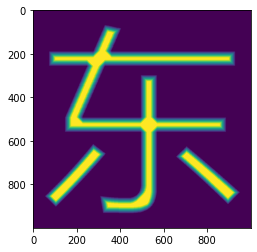

In [40]:
maxRoadScore = 30

roadImg = charImg.copy()
roadImg[roadScore >= 1] = maxRoadScore

for currOuter in range(0, maxRoadScore):
    #if pixel borders (diagonal possibly counted), note these next lines could cause border effects if a "road" is touching the border
    tempImg = roadImg.copy()
    borderMask  = tempImg[1:-1, 1:-1] == currOuter
    #neighbor is on border and is not already set
    #tempImg[0:-2,0:-2][borderMask & (tempImg[0:-2,0:-2] == maxRoadScore)] = currOuter+1 #top left
    tempImg[0:-2,1:-1][borderMask & (tempImg[0:-2,1:-1] == maxRoadScore)] = currOuter+1 #top
    #tempImg[0:-2,2:][  borderMask & (tempImg[0:-2,2:] == maxRoadScore)]   = currOuter+1 #top right
    tempImg[1:-1,0:-2][borderMask & (tempImg[1:-1,0:-2] == maxRoadScore)] = currOuter+1 #left
    tempImg[1:-1,2:][  borderMask & (tempImg[1:-1,2:] == maxRoadScore)]   = currOuter+1 #top
    #tempImg[2:,0:-2][  borderMask & (tempImg[2:,0:-2] == maxRoadScore)]   = currOuter+1 #bottom left
    tempImg[2:,1:-1][  borderMask & (tempImg[2:,1:-1] == maxRoadScore)]   = currOuter+1 #bottom
    #tempImg[2:,2:][    borderMask & (tempImg[2:,2:] == maxRoadScore)]     = currOuter+1 #bottom right
    
    roadImg = tempImg.copy()
    
plt.imshow(roadImg)